In [1]:
import numpy as np   # For linear algebra calculation
import pandas as pd  # For using dataframe
import seaborn as sns # To plot the stastitical chart
import matplotlib.pyplot as plt

# For Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Ignore the warnings in command line
import warnings

warnings.filterwarnings("ignore")

## Loading and viewing dataset

In [2]:
# Link of datasets
url_train = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/datatrain_PNR.csv"
url_test = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/datatest_PNR.csv"

# Loading dataset
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train.head()

,nox,room,price,flag
0,7.274745,90.0,107.558,train
1,6.853539,9.0,74.943,train
2,5.613546,121.0,455.991,train
3,6.942140,134.0,159.316,train
4,4.357362,35.0,868.430,train


# Initial viewing
- Gói (package) [nhandv6_package_1](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/US-Embassy_DS-course/Class%201/nhandv6_package_1.py) được trích từ thư viện `do_van_nhan_fr_stats` (được thiết kế trong quá trình xây dựng các nền tảng AI cho một số công ty), được cá nhân hóa và giới hạn lượt sử dụng, khuyến cáo người dùng không nên tìm hiểu!
- Function dưới đây `regression_compare` được dùng để hiển thị sơ bộ các đồ thị như

>> Đồ thị phân tán - scatter_plot : so sánh sự phân tán dữ liệu của các biến độc lập đến biến phụ thuộc

>> Đồ thị nhiệt - heatmap : cho thấy mức độ tương quan giữa các biến độc lập đến biến phụ thuộc.

>> Đồ thị ước lượng hàm mật độ - distribution_plot : để kiểm tra giá trị của biến phụ thuộc $y$ có phân phối chuẩn hay không

- Cú pháp (syntax):

            regression_compare(df_train, df_test, target_col)
            
trong đó,

    df_train : dữ liệu dùng để train
    df_test : dữ liệu dùng để test
    target_col : tên của biến phụ thuộc, ở đây là price.

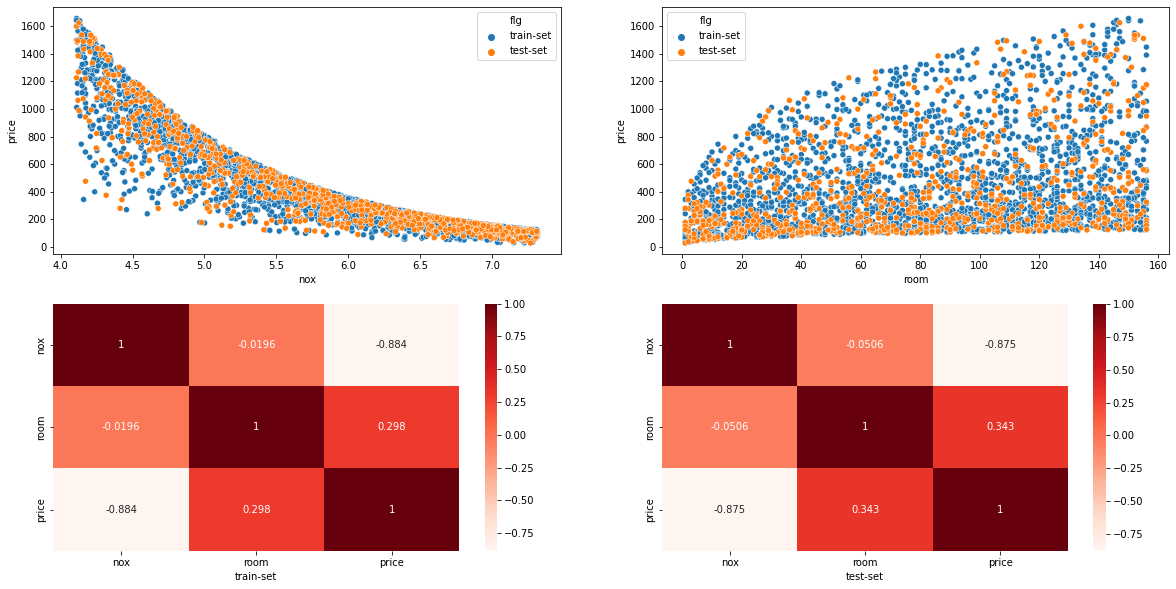

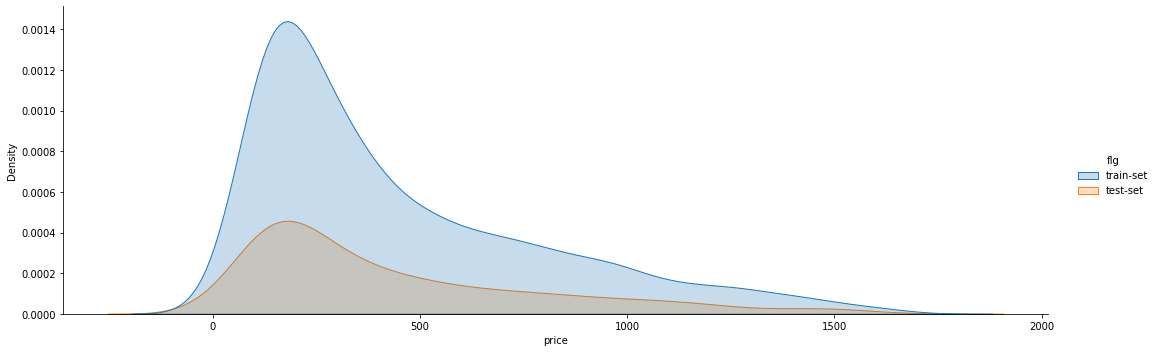

In [3]:
import nhandv6_package_1 as dvn
dvn.regression_compare(df_train, df_test, 'price')

Từ 2 đồ thị phân tán ở hàng đầu tiên, ta thấy rằng
- `price` và `nox` với `price` và `room` không có liên hệ tuyến tính mạnh (strongly linearity), vì vậy miễn cưỡng áp dụng mô hình hồi quy tuyến tính bội

$$ \text{price} = \beta_0 + \beta_1*\text{nox} + \beta_2*\text{room} $$

- Hàng thứ 2 cho thấy biến `room` (số phòng trong một căn hộ) có tương quan rất yếu với `price` (hệ số tương quan là $0.298$ trên tập train và $0.343$ trên tập test), trong khi `nox` lại ảnh hưởng rất mạnh đến `price` ($-0.884$ trên tập train và $-0.875$ trên tập test). Liên hệ thực tế thì vấn đề này sẽ giải thích bởi

>> Việc số phòng nhiều hơn sẽ tác động trực tiếp đến việc tăng giá căn hộ / chung cư; tuy nhiên mức độ tương quan này không cao và chưa có một liên hệ tuyến tính.

>> Chỉ số ô nhiễm "nox" (nitro oxit) càng cao sẽ quyết định trực tiếp vào việc làm mất đi giá trị cho thuê của căn hộ.

- Cuối cùng, đồ thị biểu đồ hàm mật độ cho thấy rằng `price` tương đối có phân phối chuẩn và lệch phải! Ta sẽ sử dụng tiếp kiểm định Kolmogorov-Siminov để xem rằng `price` có phân phối chuẩn hay không? Lưu ý rằng đỉnh của phân phối chuẩn là khu vực của trung vị (median) ko phải trung bình (mean).

In [4]:
y = df_train['price']
dvn.normality_testing(y, muy = y.median(), 
                      sigma = y.std(), 
                      alternative = 'greater', 
                      alpha = 0.05)

|====================================================================================================
|                                        Testing normality.
|****************************************************************************************************|
|
|	Your statistical_testing = 0.003933040215897354, p_value = 0.9260143564774096
|
|	For confidence_level = 95.0% and alternative = 'greater', your data is normality
|
|/==================================================================================================\|


Từ kiểm định trên, ta thấy rằng `price` có phân phối chuẩn với $\alpha = 0.05$

# Model 1. Linear regression

Đầu tiên, nhập mô hình hồi quy vào thư viện `statsmodels` để kiểm tra các hệ số của nó và các metrics như AIC, BIC, R2 và R2_hiệu chỉnh!

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_1 = smf.ols('price ~ nox + room', data=df_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     7372.
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:12:21   Log-Likelihood:                -15122.
No. Observations:                2400   AIC:                         3.025e+04
Df Residuals:                    2397   BIC:                         3.027e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2214.0210     17.855    123.997      0.0

### Metrics explaination

$$ \begin{array}{lcl} R^2_{\text{score}} \text{ (coefficient of determinant) } &=& 1 - \dfrac{SSR}{SST} \\ R^2_{\text{adj}} \text{ (Adjusted R Squared)} &=& 1 - \left( \dfrac{(n - 1) \left( 1 - R^2_{\text{score}} \right)}{n - k - 1} \right) \\ \text{MAPE} \text{ (Mean Absolute Percentage Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left\vert \dfrac{y_k^{\text{true}} - y_k^{\text{pred}}}{y_i^{\text{true}}} \right\vert \\ \text{MAE} \text{ (Mean Absolute Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left\vert y_k^{\text{true}} - y_k^{\text{pred}} \right\vert \\ \text{MSE}  \text{ (Mean Squared Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left( y_k^{\text{true}} - y_k^{\text{pred}} \right)^2 \\ \text{RMSE}  \text{ (Root Mean Squared Error)} &=& \sqrt{\text{MSE}} \\ \text{RMSLE}  \text{ (Root Mean Squared Logaritmic Error)} &=& \dfrac{1}{n} \displaystyle \sqrt{ \sum_{k=1}^n \left( \log(y_k^{\text{pred}} + 1) - \log(y_k^{\text{true}} + 1) \right)^2 } \\ \text{AIC} \text{ (Akaike Information Criterion)} &=& \dfrac{2}{n} \left( k - LL \right) \\  \text{BIC}  \text{ (Bayesian Information Criterion)} &=& -2 LL + k \log(n) \end{array}$$

Tuy nhiên, nếu ta muốn kiểm chứng thêm các tiêu chuẩn khác như MSE, MAE, MAPE, etc thì thư viện này không cung cấp đầy đủ!

In [7]:
fill_vl = df_train[['nox', 'room']].mean()

X_train, y_train = dvn.load_data(df_train, fill_vl = fill_vl, 
                                  target_col = 'price', 
                                  inp_col_names = ['nox', 'room'])
X_test, y_test = dvn.load_data(df_test, fill_vl = fill_vl, 
                                  target_col = 'price', 
                                  inp_col_names = ['nox', 'room'])

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = 53)
MLA_df = pd.DataFrame(columns = ['MLA_name', 'train-test.shape', 'trained_time', 'best_params', 
                                 'std_score_kfolds', 'train_score', 'test_score', 
                                 'MAPE_test', 'MAE_test', 'MSE_test', 'Pearson_corr'
                                ]                       
                     )
params = {
            'n_jobs' : [1, 2, 3, 4],
            'normalize' : [True, False]
          }
MLA_df.loc[0] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       LinearRegression(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((2400, 2), (800, 2))",0 mins 0.27 seconds,"{'n_jobs': 1, 'normalize': True}",0.005611,0.860161,0.854357,0.499533,107.213171,18454.623446,0.924479


Sau đây là đồ thị Q-Q plot, để kiểm chứng các giá trị dự đoán và giá trị thực tế có nằm trên cùng một đường thẳng (đường phân giác góc phần tư thứ nhất) hay không?

Đồ thị này cũng sẽ kiểm chứng các quantile trên dữ liệu dự đoán và dữ liệu thực tế có cùng nhau hay không?

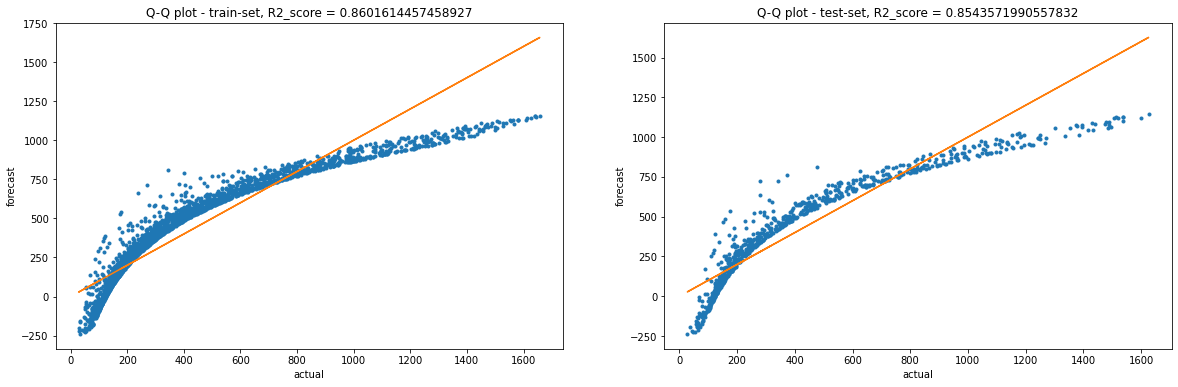

In [8]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)

## Model 2.
Cuối cùng, ta sẽ biến đổi dữ liệu để nó trở về mô hình đúng của nó.
- Đầu tiên, biến đổi `price` thành `log(price)`; lúc này mục tiêu của chúng ta là `log(price)` chứ không cần quan tâm đến `price` (mô hình cũ) nữa!

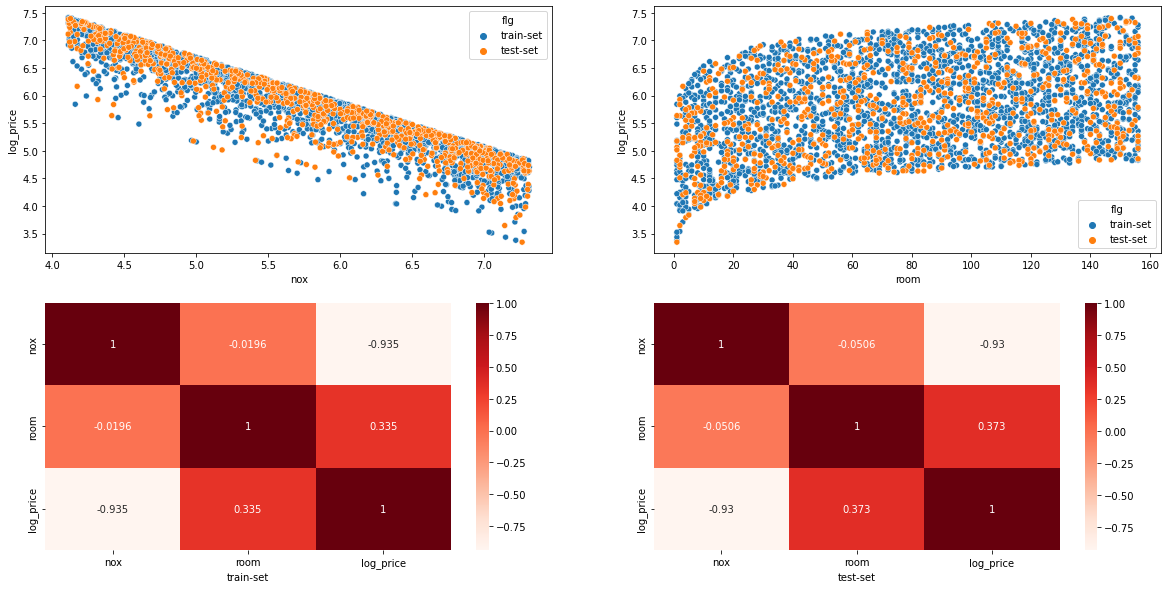

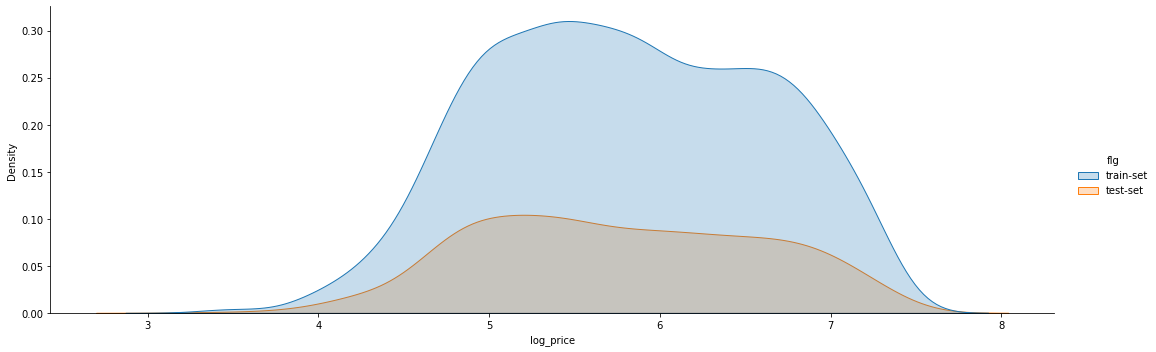

In [9]:
df_train['log_price'] = np.log(df_train['price'] + 1)
df_test['log_price'] = np.log(df_test['price'] + 1)

dvn.regression_compare(df_train.drop(columns = 'price'), 
                       df_test.drop(columns = 'price'),
                       target_col = 'log_price')

Lúc này, `log_price` và `nox` đã có tương quan tuyến tính, thậm chí còn mạnh hơn mô hình cũ ($-0.935$ so với $-0.884$ trên tập train và $-0.93$ so với $-0.875$ trên tập test)

Tuy nhiên, `log_price` và `room` vẫn chưa có quan hệ tuyến tính, trông như `"log_price" = a*log(room + b) + c`

- Vì vậy, ta sẽ thử biến đổi `room` dưới dạng `log(room + 1)` tương tự như ở trên.

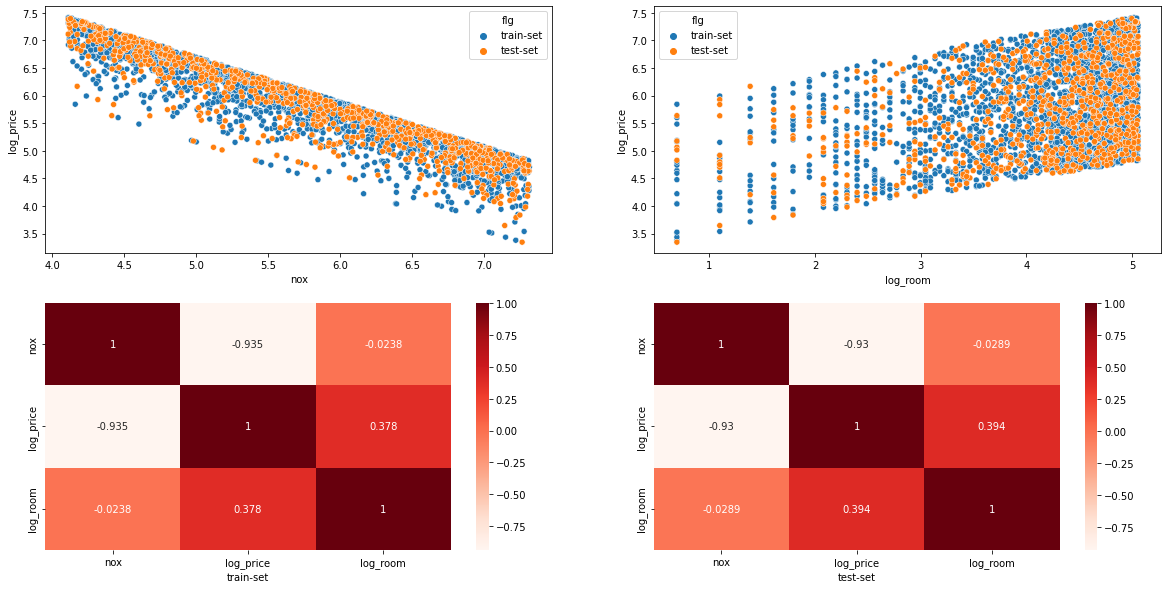

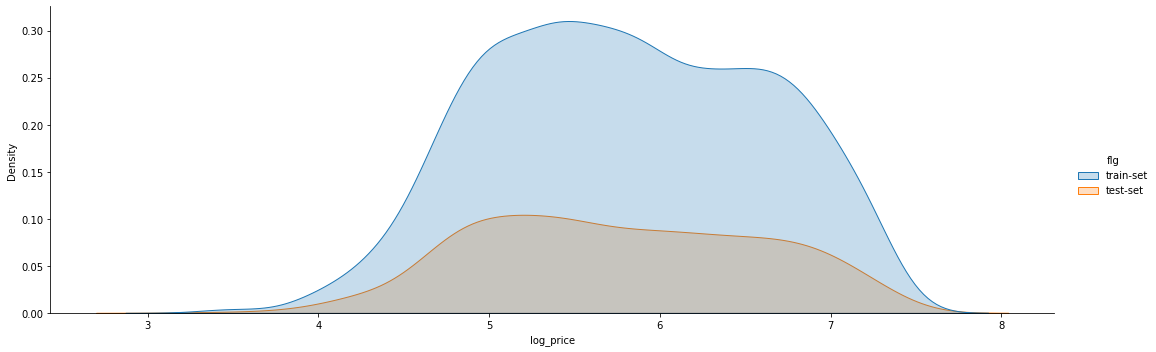

In [10]:
df_train['log_room'] = np.log(df_train['room'] + 1)
df_test['log_room'] = np.log(df_test['room'] + 1)

dvn.regression_compare(df_train.drop(columns = ['price', 'room']), 
                       df_test.drop(columns = ['price', 'room']),
                       target_col = 'log_price')

Cuối cùng, ta sẽ kiểm chứng độ phù hợp của mô hình này!

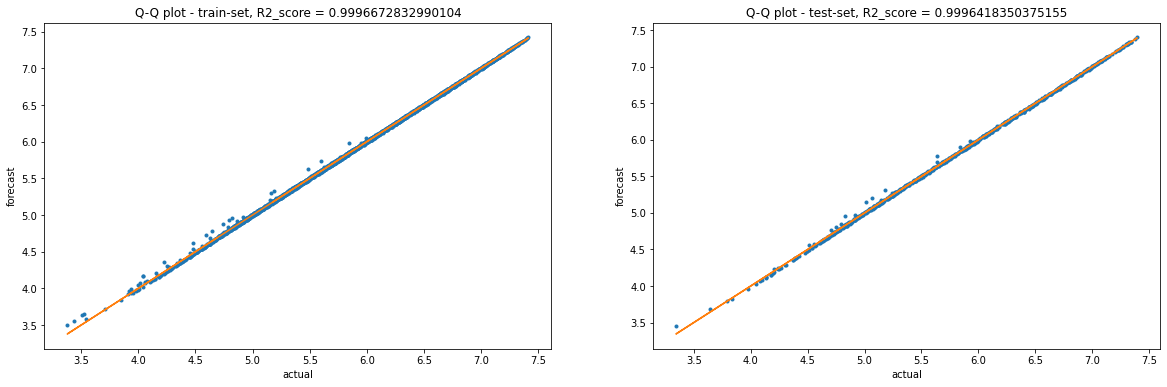

In [11]:
X_train, y_train = dvn.load_data(df_train.drop(columns = ['price', 'room']), fill_vl = fill_vl, 
                                  target_col = 'log_price', 
                                  inp_col_names = ['nox', 'log_room'])
X_test, y_test = dvn.load_data(df_test.drop(columns = ['price', 'room']), fill_vl = fill_vl, 
                               target_col = 'log_price', 
                               inp_col_names = ['nox', 'log_room'])

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)

Hầu hết các điểm lúc này đã nằm trên cùng một đường thẳng, do đó mô hình này giải thích tốt hơn rất nhiều so với mô hình trước đó, nếu các vị muốn biết các chỉ số AIC, BIC hoặc `p_value` của mô hình này như thế nào, hãy nhìn bảng dưới đây!

In [12]:
model_2 = smf.ols('np.log(price + 1) ~ nox + np.log(room + 1)', data=df_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.601e+06
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:13:26   Log-Likelihood:                 6726.4
No. Observations:                2400   AIC:                        -1.345e+04
Df Residuals:                    2397   BIC:                        -1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.1356      0.002   3824.311      0.000       9.131       9.140
nox                 -0.8120      0.000  -2484.911      0.000      -0.813      -0.811
np.log(room + 1)     0.3233      0.000    954.021      0.000       0.323       0.324
==============================================================================
Omnibus:                     2721.533   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259360.824
Skew:                          -5.790   Prob(JB):                         0.00
Kurtosis:                      52.593   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

hoặc...

In [13]:
model_2 = smf.ols('log_price ~ nox + log_room ', data=df_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.601e+06
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:13:29   Log-Likelihood:                 6726.4
No. Observations:                2400   AIC:                        -1.345e+04
Df Residuals:                    2397   BIC:                        -1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1356      0.002   3824.311      0.0

In [16]:
MLA_df.loc[1] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       LinearRegression(), params, kfold_cv)
MLA_df.rename(index = {0 : 'model_1: linear model',
                       1 : 'model_2: log(price) and log(room)'
                      })

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
model_1: linear model,LinearRegression,"((2400, 2), (800, 2))",0 mins 0.27 seconds,"{'n_jobs': 1, 'normalize': True}",0.005611,0.860161,0.854357,0.499533,107.213171,18454.623446,0.924479
11,LinearRegression,"((2400, 2), (800, 2))",0 mins 0.26 seconds,"{'n_jobs': 1, 'normalize': True}",0.000083,0.999667,0.999642,0.001573,0.008405,0.000241,0.999821
model_2: log(price) and log(room),LinearRegression,"((2400, 2), (800, 2))",0 mins 0.26 seconds,"{'n_jobs': 1, 'normalize': True}",0.000083,0.999667,0.999642,0.001573,0.008405,0.000241,0.999821
